# Install the Needed Packages

In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install keras
!pip install openpyxl
!pip install tensorflow
!pip install ipympl
from ipywidgets import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
print('All Needed Packages Installed')

     |████████████████████████████████| 11.3 MB 4.7 MB/s            
     |████████████████████████████████| 15.7 MB 70.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 4.6 MB/s            ████████████████████▉   | 22.4 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 38.1 MB 38.6 MB/s            
     |████████████████████████████████| 306 kB 53.1 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=c07c7b6c3e1bb94608f79bec8f32908ccdb4a80acc02f03a81fc4656e96ef678
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 11.2 MB 4.8 MB/s            
     |████████████████████████████████| 4.3 MB 45.7 MB/s            
     |████████████████████████████████| 930 kB 52.1 MB/s            
     |████████████████████████████████| 1.1 MB 44.1 MB/s 

2022-05-12 02:48:25.268665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-12 02:48:25.268717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


All Needed Packages Installed


# Load Data

In [21]:
loadData = pd.read_excel('MISO_Central_Load.xlsx')
loadData.DTTM = pd.to_datetime(loadData.DTTM)
weatherData = pd.read_excel('Milwaukee_Weather.xlsx')
weatherData.time = pd.to_datetime(weatherData.time)
display(loadData.head())
display(weatherData.head())

,DTTM,Forecast,Actual
0,2017-01-01 01:00:00,33932,33851.44
1,2017-01-01 02:00:00,33806,33072.33
2,2017-01-01 03:00:00,33645,32415.59
3,2017-01-01 04:00:00,33417,32088.82
4,2017-01-01 05:00:00,33527,32108.70


,time,Humidity,Temperature,SkinTemperature,Wind
0,2017-01-01 00:30:00+00:00,0.001464,262.334564,259.558014,1.644908
1,2017-01-01 01:30:00+00:00,0.001499,262.800812,260.698242,1.663691
2,2017-01-01 02:30:00+00:00,0.001562,264.071838,263.281555,1.768878
3,2017-01-01 03:30:00+00:00,0.001692,266.057617,266.335693,2.059685
4,2017-01-01 04:30:00+00:00,0.001735,267.240967,268.372803,2.588993


In [15]:
display(loadData.describe())
display(weatherData.describe())

,Forecast,Actual
count,26279.000000,26279.000000
mean,39968.864493,39591.571482
std,6488.516953,6523.880196
min,26867.000000,26475.450000
25%,35397.000000,34883.060000
50%,39113.000000,38789.620000
75%,43330.500000,43131.455000
max,91034.000000,65537.790000


,Humidity,Temperature,SkinTemperature,Wind
count,26280.000000,26280.000000,26280.000000,26280.000000
mean,0.003610,283.395250,283.329712,2.901368
std,0.002265,13.467782,16.344180,2.319255
min,0.000288,253.277710,247.362244,0.010850
25%,0.001644,271.767555,269.873451,1.158324
50%,0.003048,283.823242,283.378418,2.229737
75%,0.005256,294.344009,295.455856,3.956002
max,0.013111,314.932068,325.466614,17.291794


# Create Features

In [19]:
features = pd.DataFrame([])
features['dttm'] = loadData.DTTM
features['hour'] = loadData.DTTM.dt.hour
features['dayOfYear'] = loadData.DTTM.dt.dayofyear
features['dayOfWeek'] = loadData.DTTM.dt.dayofweek
features = pd.merge_asof(features, weatherData, left_on = 'dttm', right_on = 'time')
features.head()

MergeError: Incompatible merge dtype, dtype('O') and dtype('<M8[ns]'), both sides must have numeric dtype

# Create the "y" variable

In [4]:
target = loadData.Actual

# Split the data into training and testing data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, shuffle = False, test_size = 0.2)
testTime = X_test.dttm
X_train = X_train.drop(columns = ['dttm'])
X_test = X_test.drop(columns = ['dttm'])

# Create a blank model to be trained

In [6]:
model = RandomForestRegressor(n_estimators = 2)
# model = LinearRegression()
# model = SVR()

# Train the Model and Predict the Test Set

In [7]:
# Sklearn
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
mae = 100*sum(abs(prediction - Y_test))/sum(Y_test)
print(f'Average Absolute Hourly Miss: {mae} %')

Average Absolute Hourly Miss: 8.753389658661712 %


In [ ]:
# Keras
# model = Sequential()
# model.add(Dense(20, input_dim = len(features.columns), activation = 'relu'))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1))
# model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = 'mean_absolute_error')
# Run if using neural network
# scaler = StandardScaler()
# features = scaler.fit_transform(features, target)
# model.fit(X_train, Y_train, epochs = 50)
# prediction = model.predict(X_test)
# mae = 100*sum(abs(prediction.ravel() - Y_test))/sum(Y_test)
# print(f'Average Absolute Hourly Miss: {mae} %')
# plt.scatter(prediction, Y_test)

# Plot Results

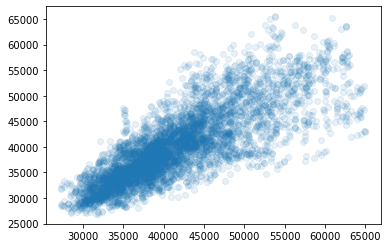

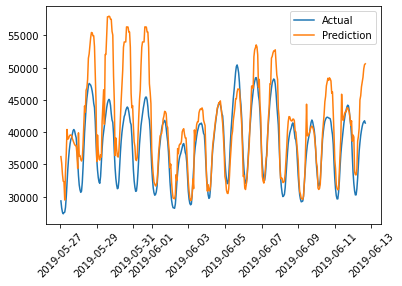

In [9]:
plt.scatter(prediction, Y_test, alpha = 0.1)
plt.figure()
plt.plot(testTime[0:400], Y_test[0:400])
plt.plot(testTime[0:400], prediction[0:400])
plt.xticks(rotation = 45)
plt.legend(['Actual', 'Prediction'])
